# Dataset 2: Boston Housing Dataset

1. Load the dataset. You can download the dataset from this link.

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets

data = datasets.load_boston()
#data = pd.read_csv('./housing_data.csv', delimiter=',')
df = pd.DataFrame(data.data, columns=data.feature_names)

print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

2. Fit a linear regression model:

(a) Set MEDV as the target variable and the other attributes as the features and
ordinary least square as the penalty function.

(b) Perform a 10 fold cross validation, analyze the significance of different variables
with the statistics obtained from the model you have trained, and the averaged
Root Mean Squared Error (RMSE), and plot 1) fitted values against true values
as scatter plots using the whole dataset; 2) residuals versus fitted values as
scatter plots using the whole dataset.

In [3]:
target = pd.DataFrame(data.target, columns=["MEDV"])


#model = LinearRegression().fit(X,y)

In [84]:
import numpy as np

import matplotlib.pyplot as plt

def linear_regression(X, y, plot=True, model=LinearRegression()):
    kf = KFold(n_splits=10, shuffle=True)

    cv_train_rmse, cv_test_rmse = [], []
    min_test_rmse = float("inf")

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lm = model
        lm.fit(X_train, y_train)
        train_rmse = mse(lm.predict(X_train), y_train)
        test_rmse = mse(lm.predict(X_test), y_test)

        if test_rmse < min_test_rmse:
            min_test_rmse = test_rmse
            best_model = lm

        cv_train_rmse.append(train_rmse)
        cv_test_rmse.append(test_rmse)

    avg_train_rmse = np.sqrt(np.mean(cv_train_rmse))
    avg_test_rmse = np.sqrt(np.mean(cv_test_rmse))

    print("Coefficients are : ", best_model.coef_)
    best_model_y_predict = best_model.predict(X)

    best_model_y_predict = best_model_y_predict.reshape(y.shape)

    plt.figure(figsize=(8, 5))
    plt.scatter(y, best_model_y_predict, s=5)
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.title("Fitted values vs True values")
    plt.show()

    plt.figure(figsize=(8, 5))
    plt.scatter(best_model_y_predict, y - best_model_y_predict, s=5)
    plt.xlabel("Fitted values")
    plt.ylabel("Residual values")
    plt.title("Residual values vs Fitted values")
    plt.show()

    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(y)), y, c='g', marker='x', label='True values')
    plt.scatter(range(len(y)), best_model_y_predict, c='b', marker='o', label='Predicted Values')
    plt.title("Fitted values and True values")
    plt.legend(loc='upper left')
    plt.show()

    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(y)), best_model_y_predict, c='g', s=5, zorder=2, label='Fitted values')
    plt.scatter(range(len(y)), np.subtract(y, best_model_y_predict), c='b', s=5, zorder=1, label='Residual Values')
    plt.title("Fitted values and Residual values")
    plt.legend(loc='upper left')
    plt.yscale('log')
    plt.show()
    return avg_train_rmse, avg_test_rmse

In [5]:
X = np.array([np.concatenate((v,[1])) for v in data.data])
y = target["MEDV"]
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def mse(predicted, actual):
    return mean_squared_error(predicted, actual)

p = linreg.predict(X)
# Now we can constuct a vector of errors
err = abs(p-y)
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))

cv_train_rmse, cv_test_rmse = [], []
min_test_rmse = float("inf")

    
kf = KFold(n_splits=10, shuffle=True)
xval_err = 0
for train,test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    linreg.fit(X[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(X[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    train_rmse = mse(linreg.predict(X_train), y_train)
    test_rmse = mse(linreg.predict(X_test), y_test)
    
    if test_rmse < min_test_rmse:
        min_test_rmse = test_rmse
        best_model = linreg

    cv_train_rmse.append(train_rmse)
    cv_test_rmse.append(test_rmse)

avg_train_rmse = np.sqrt(np.mean(cv_train_rmse))
avg_test_rmse = np.sqrt(np.mean(cv_test_rmse))
print("Coefficients are : ", best_model.coef_)
best_model_y_predict = best_model.predict(X)

rmse_10cv = np.sqrt(xval_err/len(X))

method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Coefficients are :  [-1.20661404e-01  4.55333616e-02  2.71424964e-02  1.03844087e+00
 -1.87351338e+01  3.73011877e+00  4.16208944e-03 -1.49001676e+00
  3.18560181e-01 -1.41025074e-02 -1.03392655e+00  8.72311773e-03
 -4.95105080e-01  0.00000000e+00]
Method: Simple Linear Regression
RMSE on training: 4.6792
RMSE on 10-fold CV: 4.8964


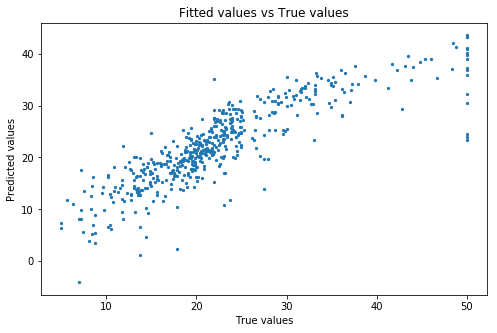

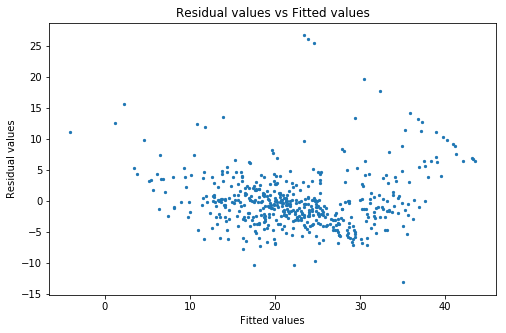

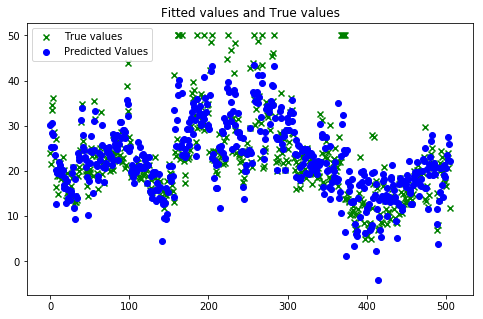

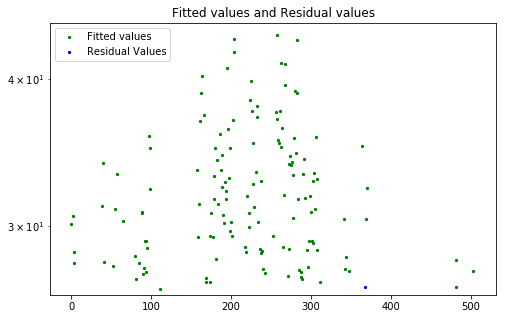

In [7]:
best_model_y_predict = best_model_y_predict.reshape(y.shape)

plt.figure(figsize=(8, 5))
plt.scatter(y, best_model_y_predict, s=5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Fitted values vs True values")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(best_model_y_predict, y - best_model_y_predict, s=5)
plt.xlabel("Fitted values")
plt.ylabel("Residual values")
plt.title("Residual values vs Fitted values")
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(range(len(y)), y, c='g', marker='x', label='True values')
plt.scatter(range(len(y)), best_model_y_predict, c='b', marker='o', label='Predicted Values')
plt.title("Fitted values and True values")
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(range(len(y)), best_model_y_predict, c='g', s=5, zorder=2, label='Fitted values')
plt.scatter(range(len(y)), np.subtract(y, best_model_y_predict), c='b', s=5, zorder=1, label='Residual Values')
plt.title("Fitted values and Residual values")
plt.legend(loc='upper left')
plt.yscale('log')
plt.show()


3. In this part, we try to control overfitting via regularization of the parameters.

(a) Perform one-hot encoding on all features, then fit and test. Report the test RMSE and train RMSE.

(b) You should have found obvious increases in test RMSE compared to training RMSE in some combinations, can you explain why this happens?

(c) To solve this problem, you can try the following regularizations with suitable
parameters.
1. Ridge Regularizer
2. Lasso Regularizer

Optimize over choices to pick one good model, report the best
RMSE obtained via 10-fold cross validation. Compare the values of the estimated coefficients for these regularized good models, with the unregularized
best model.

In [82]:
#code to be done here
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X_2 = df.apply(le.fit_transform)
X_2.head()

enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehot_encoded = enc.transform(X_2).toarray()
onehot_encoded.shape

train_rmse, test_rmse = linear_regression(onehot_encoded, y)

print(train_rmse, test_rmse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Coefficients are :  [[-0.1819335   0.42450725 -0.68093424 ... -1.01772874 -0.68898312
  -0.79762151]]
4.041456949432204e-14 5.860719252780042


In [65]:
from itertools import chain, combinations
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder


data = pd.read_csv("housing_data.csv")
input_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
output_col_name = ['MEDV']
X = data[input_features].values
y = data[output_col_name].values



# QUESTION 1


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('network_backup_dataset.csv',header=0)

In [26]:
day_no_to_key = {}

i=0
for d in data.values:  
    key = str(d[0])+","+str(d[1])
    if key not in day_no_to_key.keys():
        day_no_to_key[key]=i
        i = i+1

print(day_no_to_key)

{'1,Monday': 0, '1,Tuesday': 1, '1,Wednesday': 2, '1,Thursday': 3, '1,Friday': 4, '1,Saturday': 5, '1,Sunday': 6, '2,Monday': 7, '2,Tuesday': 8, '2,Wednesday': 9, '2,Thursday': 10, '2,Friday': 11, '2,Saturday': 12, '2,Sunday': 13, '3,Monday': 14, '3,Tuesday': 15, '3,Wednesday': 16, '3,Thursday': 17, '3,Friday': 18, '3,Saturday': 19, '3,Sunday': 20, '4,Monday': 21, '4,Tuesday': 22, '4,Wednesday': 23, '4,Thursday': 24, '4,Friday': 25, '4,Saturday': 26, '4,Sunday': 27, '5,Monday': 28, '5,Tuesday': 29, '5,Wednesday': 30, '5,Thursday': 31, '5,Friday': 32, '5,Saturday': 33, '5,Sunday': 34, '6,Monday': 35, '6,Tuesday': 36, '6,Wednesday': 37, '6,Thursday': 38, '6,Friday': 39, '6,Saturday': 40, '6,Sunday': 41, '7,Monday': 42, '7,Tuesday': 43, '7,Wednesday': 44, '7,Thursday': 45, '7,Friday': 46, '7,Saturday': 47, '7,Sunday': 48, '8,Monday': 49, '8,Tuesday': 50, '8,Wednesday': 51, '8,Thursday': 52, '8,Friday': 53, '8,Saturday': 54, '8,Sunday': 55, '9,Monday': 56, '9,Tuesday': 57, '9,Wednesday': 5

In [30]:
day_to_backup_size = {}

for d in data.values:
    key = str(d[0])+","+str(d[1])
    backup_size = d[5]
    if key not in day_to_backup_size.keys():
        day_to_backup_size[key]=0
    day_to_backup_size[key]+=backup_size

{'1,Monday': 16.662441452895028, '1,Tuesday': 8.012317076193304, '1,Wednesday': 7.3083169467783105, '1,Thursday': 10.421160912067915, '1,Friday': 9.876059211110848, '1,Saturday': 11.19774241947995, '1,Sunday': 11.15899306254798, '2,Monday': 17.601461134807803, '2,Tuesday': 8.248708133767488, '2,Wednesday': 7.256121282480543, '2,Thursday': 9.771171966011066, '2,Friday': 9.736093338220172, '2,Saturday': 11.467187840608108, '2,Sunday': 11.360356762244328, '3,Monday': 17.693142724124897, '3,Tuesday': 8.158120933085673, '3,Wednesday': 7.277152721304925, '3,Thursday': 10.144059987657949, '3,Friday': 9.951252173718043, '3,Saturday': 11.60460650794339, '3,Sunday': 11.189280107093431, '4,Monday': 17.46840525570713, '4,Tuesday': 7.91887562187176, '4,Wednesday': 7.265389409667876, '4,Thursday': 9.594929539737004, '4,Friday': 9.966533813601128, '4,Saturday': 11.660739445662443, '4,Sunday': 11.273448268675791, '5,Monday': 17.703871302047702, '5,Tuesday': 8.038423317548776, '5,Wednesday': 7.40484995

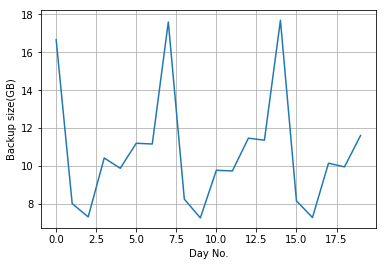

In [42]:
import matplotlib.pyplot as plt

twenty_days = [i for i in range(0,20)]
first_twenty_values = list(day_to_backup_size.values())[:20]
plt.plot(twenty_days, first_twenty_values)
plt.xlabel("Day No.")
plt.ylabel("Backup size(GB)")
plt.grid()
plt.show()

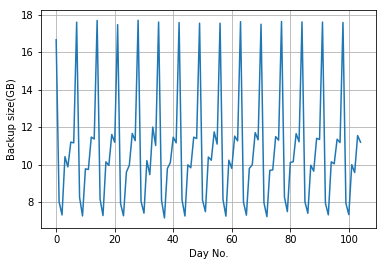

In [41]:
import matplotlib.pyplot as plt

twenty_days = [i for i in range(0,105)]
first_twenty_values = list(day_to_backup_size.values())[:105]
plt.plot(twenty_days, first_twenty_values)
plt.xlabel("Day No.")
plt.ylabel("Backup size(GB)")
plt.grid()
plt.show()